# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    """
    Находит максимальный элемент среди элементов, перед которыми стоит нулевой
    """
    # Находим индексы, где элементы равны 0
    zero_indices = np.where(arr == 0)[0]
    
    # Индексы элементов после нулевых (исключаем последний элемент если он нулевой)
    after_zero_indices = zero_indices + 1
    after_zero_indices = after_zero_indices[after_zero_indices < len(arr)]
    
    if len(after_zero_indices) == 0:
        return None
    
    # Возвращаем максимальный элемент среди тех, что после нулей
    return np.max(arr[after_zero_indices])

# Тестирование
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(f"Максимальный элемент после нулевого: {max_element(x)}")  # Должно быть 5

Максимальный элемент после нулевого: 5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    """
    Находит ближайший к v элемент в матрице X
    """
    # Вычисляем абсолютную разницу и находим минимальное значение
    absolute_diff = np.abs(X - v)
    min_index = np.argmin(absolute_diff)
    
    # Возвращаем элемент с минимальной разницей
    return X.flatten()[min_index]

# Тестирование
X = np.arange(0, 10).reshape((2, 5))
v = 3.6
print(f"Ближайшее значение к {v}: {nearest_value(X, v)}")  # Должно быть 4

Ближайшее значение к 3.6: 4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(X):
    """
    Масштабирует каждый столбец матрицы (вычитает среднее, делит на стандартное отклонение)
    """
    # Вычисляем среднее по столбцам
    column_means = np.mean(X, axis=0)
    
    # Вычисляем стандартное отклонение по столбцам
    column_stds = np.std(X, axis=0)
    
    # Избегаем деления на ноль
    column_stds[column_stds == 0] = 1
    
    # Масштабируем матрицу
    scaled_X = (X - column_means) / column_stds
    
    return scaled_X

# Тестирование
test_matrix = np.random.randint(0, 100, size=(5, 3))
print("Исходная матрица:")
print(test_matrix)
print("\nМасштабированная матрица:")
print(scale(test_matrix))

Исходная матрица:
[[22 76 60]
 [49 32 13]
 [ 0 24 34]
 [ 9  2  2]
 [ 6 24 48]]

Масштабированная матрица:
[[ 0.27504567  1.82384316  1.3325552 ]
 [ 1.82217754  0.01643102 -0.85730824]
 [-0.9855803  -0.31218937  0.12114138]
 [-0.46986968 -1.21589544 -1.36982947]
 [-0.64177322 -0.31218937  0.77344113]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    """
    Вычисляет различные статистики для матрицы
    """
    stats = {}
    
    # Определитель (только для квадратных матриц)
    if X.shape[0] == X.shape[1]:
        stats['determinant'] = np.linalg.det(X)
    else:
        stats['determinant'] = "Матрица не квадратная"
    
    # След матрицы
    stats['trace'] = np.trace(X)
    
    # Минимальный и максимальный элементы
    stats['min_element'] = np.min(X)
    stats['max_element'] = np.max(X)
    
    # Норма Фробениуса
    stats['frobenius_norm'] = np.linalg.norm(X, 'fro')
    
    # Собственные значения (только для квадратных матриц)
    if X.shape[0] == X.shape[1]:
        stats['eigenvalues'] = np.linalg.eigvals(X)
    else:
        stats['eigenvalues'] = "Матрица не квадратная"
    
    # Обратная матрица (только для квадратных невырожденных матриц)
    if X.shape[0] == X.shape[1] and np.linalg.det(X) != 0:
        stats['inverse_matrix'] = np.linalg.inv(X)
    else:
        stats['inverse_matrix'] = "Обратная матрица не существует"
    
    return stats

# Тестирование
test_matrix = np.random.normal(10, 1, size=(4, 4))
stats = get_stats(test_matrix)
for key, value in stats.items():
    print(f"{key}: {value}")

determinant: 28.013278271543133
trace: 41.10098465680234
min_element: 8.373578473374959
max_element: 11.677333995741261
frobenius_norm: 40.60805972302058
eigenvalues: [40.5275413   1.85469154 -0.83482543 -0.44642275]
inverse_matrix: [[ 0.4727266   0.15800751 -0.44951328 -0.11560213]
 [-0.25083947 -0.6214609   1.07378483 -0.14985191]
 [ 0.99504945 -0.05058002 -1.97284932  1.05904351]
 [-1.10117412  0.55061573  1.26000253 -0.75245301]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
# Список для хранения максимальных элементов
max_elements = []

# Проводим 100 экспериментов
for exp_num in range(100):
    # Генерируем две матрицы 10x10 из стандартного нормального распределения
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)
    
    # Перемножаем матрицы
    C = np.dot(A, B)
    
    # Находим максимальный элемент
    max_element = np.max(C)
    max_elements.append(max_element)

# Вычисляем среднее значение и 95% квантиль
mean_max = np.mean(max_elements)
quantile_95 = np.percentile(max_elements, 95)

print(f"Среднее значение максимальных элементов: {mean_max:.4f}")
print(f"95% квантиль максимальных элементов: {quantile_95:.4f}")

Среднее значение максимальных элементов: 8.7599
95% квантиль максимальных элементов: 12.5255


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [7]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [8]:
# Загрузка данных
df = pd.read_csv('2008.csv')

# Просмотр основных информации о данных
print("Размер данных:", df.shape)
print("\nПервые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())

Размер данных: (70000, 29)

Первые 5 строк:
   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      6          18          3   2111.0        2055   2308.0   
1  2008      6           4          3   1426.0        1410   1730.0   
2  2008      8           3          7   1143.0        1145   1501.0   
3  2008      1          23          3   1141.0        1144   1323.0   
4  2008      5           4          7    815.0         820   1243.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2300            WN        242  ...    3.0      8.0          0   
1        1728            XE       2380  ...    4.0     12.0          0   
2        1520            WN       1769  ...    4.0      9.0          0   
3        1335            OO       3802  ...    4.0     19.0          0   
4        1300            WN        399  ...    4.0      8.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0              

In [9]:
# Самая частая причина отмены рейса
cancellation_counts = df['CancellationCode'].value_counts()
most_common_cancellation = cancellation_counts.index[0]

print("Распределение причин отмены:")
print(cancellation_counts)
print(f"\nСамая частая причина отмены: {most_common_cancellation}")

# Расшифровка кодов (из описания данных):
# A = carrier, B = weather, C = NAS, D = security
code_explanations = {
    'A': 'Carrier (авиакомпания)',
    'B': 'Weather (погода)', 
    'C': 'NAS (Национальная воздушная система)',
    'D': 'Security (безопасность)'
}

if most_common_cancellation in code_explanations:
    print(f"Расшифровка: {code_explanations[most_common_cancellation]}")

Распределение причин отмены:
CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64

Самая частая причина отмены: A
Расшифровка: Carrier (авиакомпания)


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [10]:
# Статистики по расстоянию
mean_distance = df['Distance'].mean()
min_distance = df['Distance'].min()
max_distance = df['Distance'].max()
std_distance = df['Distance'].std() 

print("Статистики по расстоянию полета:")
print(f"mean: {mean_distance:.2f} миль")
print(f"min: {min_distance:.2f} миль")
print(f"max: {max_distance:.2f} миль")
print(f"std: {std_distance:.2f} миль")

Статистики по расстоянию полета:
mean: 724.51 миль
min: 31.00 миль
max: 4962.00 миль
std: 565.49 миль


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [11]:
# Находим минимальное расстояние
min_distance = df['Distance'].min()
print(f"Минимальное расстояние: {min_distance} миль")

# Находим рейсы с минимальным расстоянием
min_distance_flights = df[df['Distance'] == min_distance]
print(f"\nКоличество рейсов с минимальным расстоянием: {len(min_distance_flights)}")


print("\nИнформация о рейсах с минимальным расстоянием:")
print(min_distance_flights[['Month', 'DayofMonth', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Distance']].head())
    
# Анализ тех же рейсов в другие дни
carrier_flight_pairs = min_distance_flights[['UniqueCarrier', 'FlightNum']].drop_duplicates()
    
print(f"\nАнализ {len(carrier_flight_pairs)} уникальных пар авиакомпания-номер рейса:")
    
for _, pair in carrier_flight_pairs.iterrows():
    carrier = pair['UniqueCarrier']
    flight_num = pair['FlightNum']
        
    # Находим все рейсы с этой парой авиакомпания-номер
    same_flights = df[(df['UniqueCarrier'] == carrier) & (df['FlightNum'] == flight_num)]
        
    if len(same_flights) > 1:
        print(f"\nРейс {carrier}{flight_num}:")
        print(f"  Расстояния в разные дни: {same_flights['Distance'].unique()}")
        print(f"  Количество различных расстояний: {len(same_flights['Distance'].unique())}")

Минимальное расстояние: 31 миль

Количество рейсов с минимальным расстоянием: 6

Информация о рейсах с минимальным расстоянием:
       Month  DayofMonth UniqueCarrier  FlightNum Origin Dest  Distance
1116      12          30            AS         65    WRG  PSG        31
6958      12          26            AS         65    WRG  PSG        31
17349      8          18            AS         64    PSG  WRG        31
27534      3          11            AS         64    PSG  WRG        31
46082      8           9            AS         65    WRG  PSG        31

Анализ 2 уникальных пар авиакомпания-номер рейса:

Рейс AS65:
  Расстояния в разные дни: [ 31 680  82 571 123]
  Количество различных расстояний: 5

Рейс AS64:
  Расстояния в разные дни: [680  82 123  31 571]
  Количество различных расстояний: 5


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [12]:
# Аэропорт с наибольшим количеством вылетов
departure_counts = df['Origin'].value_counts()
busiest_airport = departure_counts.index[0]
busiest_count = departure_counts.iloc[0]

print(f"Аэропорт с наибольшим количеством вылетов: {busiest_airport}")
print(f"Количество вылетов: {busiest_count}")


Аэропорт с наибольшим количеством вылетов: ATL
Количество вылетов: 4134


In [13]:
#!pip3 install airportsdata

In [14]:
import airportsdata

airports = airportsdata.load('IATA')

def ciudad_desde_iata(siglas):
    aeropuerto = airports.get(siglas.upper())
    return aeropuerto['city'] if aeropuerto else "No encontrado"

# Uso rápido
print(ciudad_desde_iata(busiest_airport)) 


Atlanta


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [15]:
# Среднее время полета по аэропортам вылета
mean_airtime_by_origin = df.groupby('Origin')['AirTime'].mean()

# Аэропорт с наибольшим средним временем полета
airport_max_airtime = mean_airtime_by_origin.idxmax()
max_airtime_value = mean_airtime_by_origin.max()

print(f"Аэропорт с наибольшим средним временем полета: {airport_max_airtime}")
print(f"Среднее время полета: {max_airtime_value:.2f} минут")

print("\nТоп-5 аэропортов по среднему времени полета:")
print(mean_airtime_by_origin.sort_values(ascending=False).head())

Аэропорт с наибольшим средним временем полета: SJU
Среднее время полета: 205.20 минут

Топ-5 аэропортов по среднему времени полета:
Origin
SJU    205.200000
BQN    193.954545
PSE    191.875000
STT    185.029412
ANC    165.415094
Name: AirTime, dtype: float64


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [16]:
# Группируем по аэропортам и вычисляем статистики
def delayed_ratio(group):
    """Вычисляет долю задержанных рейсов"""
    total_flights = len(group)
    delayed_flights = len(group[group['DepDelay'] > 0])
    return delayed_flights / total_flights if total_flights > 0 else 0

# Применяем группировку с фильтрацией
airport_stats = df.groupby('Origin').filter(lambda x: len(x) >= 1000)
delayed_ratios = airport_stats.groupby('Origin').apply(delayed_ratio, include_groups=False)

# Аэропорт с наибольшей долей задержек
max_delay_airport = delayed_ratios.idxmax()
max_delay_ratio = delayed_ratios.max()

print(f"Аэропорт с наибольшей долей задержанных рейсов: {max_delay_airport}")
print(f"Доля задержанных рейсов: {max_delay_ratio:.4f} ({max_delay_ratio*100:.2f}%)")

print("\nТоп-5 аэропортов по доле задержанных рейсов:")
top_delayed = delayed_ratios.sort_values(ascending=False).head()
for airport, ratio in top_delayed.items():
    print(f"{airport}: {ratio:.4f} ({ratio*100:.2f}%)")
 

Аэропорт с наибольшей долей задержанных рейсов: EWR
Доля задержанных рейсов: 0.5112 (51.12%)

Топ-5 аэропортов по доле задержанных рейсов:
EWR: 0.5112 (51.12%)
IAH: 0.4685 (46.85%)
ORD: 0.4645 (46.45%)
DFW: 0.4594 (45.94%)
BWI: 0.4525 (45.25%)


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [17]:
# Загрузка данных для регрессии
df_regression = pd.read_csv('2008.csv')

# Вопрос 1: Имеются ли в данных пропущенные значения?
total_missing = df_regression.isnull().sum().sum() #tabla
has_missing_values = total_missing > 0
print(f"1. Имеются ли в данные пропущенные значения? {'Да' if has_missing_values else 'Нет'}")

# Вопрос 2: Сколько всего пропущенных элементов в таблице "объект-признак"? #filas-columnas
print(f"2. Всего пропущенных элементов в таблице: {total_missing}")
print(f"   Всего элементов в таблице: {df_regression.size}") #filas x columnas

# Вопрос 3: Сколько объектов имеют хотя бы один пропуск?
objects_with_missing = df_regression.isnull().any(axis=1).sum() #fila
print(f"3. Объектов с хотя бы одним пропуском: {objects_with_missing}")
print(f"   Всего объектов в данных: {len(df_regression)}") #numero total del filas

# Вопрос 4: Сколько признаков имеют хотя бы одно пропущенное значение?
features_with_missing = df_regression.isnull().any(axis=0).sum() #col
print(f"4. Признаков с хотя бы одним пропуском: {features_with_missing}")
print(f"   Всего признаков в данных: {len(df_regression.columns)}") #col totales


1. Имеются ли в данные пропущенные значения? Да
2. Всего пропущенных элементов в таблице: 355215
   Всего элементов в таблице: 2030000
3. Объектов с хотя бы одним пропуском: 70000
   Всего объектов в данных: 70000
4. Признаков с хотя бы одним пропуском: 16
   Всего признаков в данных: 29


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [18]:
# 1. Анализ пропусков в целевой переменной
depdelay_missing = df_regression['DepDelay'].isnull().sum()
print(f"1. Пропуски в DepDelay: {depdelay_missing}")

# 2. Анализ объектов с пропущенной DepDelay
if depdelay_missing > 0:
    missing_target = df_regression[df_regression['DepDelay'].isnull()] #tabla con valores nulos de DepDelay
    print(f"2. Анализ {len(missing_target)} записей:")
    print(f"   - Отмененные рейсы: {missing_target['Cancelled'].sum()}")
    print(f"   - Перенаправленные рейсы: {missing_target['Diverted'].sum()}")

# 3. Очистка данных
df_clean = df_regression.dropna(subset=['DepDelay'])
df_clean = df_clean[df_clean['DepDelay'] != 0]

# 4. Исключение проблемных признаков
features_to_exclude = ['Cancelled', 'CancellationCode', 'Diverted']

X = df_clean.drop(['DepDelay'] + features_to_exclude, axis=1)
y = df_clean['DepDelay']

print(f"3. Результат очистки:")
print(f"   - Исходный размер: {df_regression.shape}")
print(f"   - После очистки: {df_clean.shape}")
print(f"   - Исключено признаков: {len(features_to_exclude)}")
print(f"   - Финальные размеры: X{X.shape}, y{y.shape}")


1. Пропуски в DepDelay: 1399
2. Анализ 1399 записей:
   - Отмененные рейсы: 1399
   - Перенаправленные рейсы: 0
3. Результат очистки:
   - Исходный размер: (70000, 29)
   - После очистки: (63404, 29)
   - Исключено признаков: 3
   - Финальные размеры: X(63404, 25), y(63404,)


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [19]:
def split_time_features(df, time_columns): # Разделяет временные признаки формата hhmm на часы и минуты

    df_transformed = df.copy()
    
    for col in time_columns:
        # Создаем временные признаки
        df_transformed[f'{col}_Hour'] = df[col] // 100 #division entera: horas
        df_transformed[f'{col}_Minute'] = df[col] % 100
        
        # Заменяем некорректные значения на NaN
        df_transformed.loc[df_transformed[f'{col}_Hour'] > 23, f'{col}_Hour'] = np.nan
        df_transformed.loc[df_transformed[f'{col}_Minute'] > 59, f'{col}_Minute'] = np.nan
        
        # Удаляем исходный признак
        df_transformed = df_transformed.drop(col, axis=1) #eliminamos la columna original
    
    return df_transformed

# Применяем преобразование к временным признакам
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
X_transformed = split_time_features(X, time_columns)

print(f"Размерность после преобразования временных признаков: {X_transformed.shape}")
print(f"Новые признаки: {[col for col in X_transformed.columns if 'Hour' in col or 'Minute' in col]}")

Размерность после преобразования временных признаков: (63404, 29)
Новые признаки: ['DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [20]:
# Исключаем признаки, которые сильно коррелируют с целевой переменной или содержат информацию о ответе

columns_to_drop = [
    'Year',  # Исключаем по условию
    'TailNum',  # Исключаем по условию
    'ArrDelay',  # Содержит информацию о задержке прибытия, что сильно коррелирует с задержкой вылета
    'ActualElapsedTime',  # Содержит информацию о полном времени полета
    'CRSElapsedTime',  # Планируемое время полета
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',  # Причины задержек
    'Cancelled', 'CancellationCode', 'Diverted'  # Информация об отменах/перенаправлениях
]

# Оставляем только существующие колонки
existing_columns_to_drop = [col for col in columns_to_drop if col in X_transformed.columns]
X_filtered = X_transformed.drop(existing_columns_to_drop, axis=1)

print(f"Исключенные признаки: {existing_columns_to_drop}")
print(f"Размерность после исключения признаков: {X_filtered.shape}")

Исключенные признаки: ['Year', 'TailNum', 'ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
Размерность после исключения признаков: (63404, 19)


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

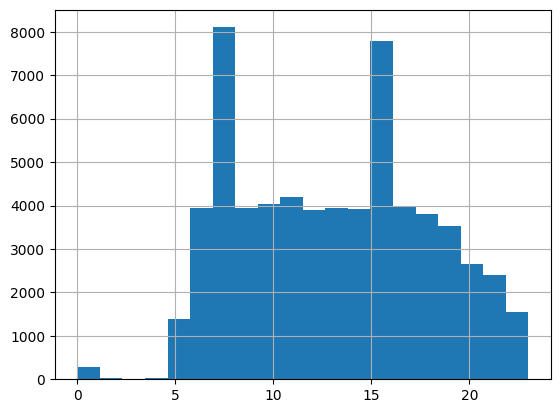

In [21]:
X_filtered['DepTime_Hour'].hist(bins=20)

<Axes: >

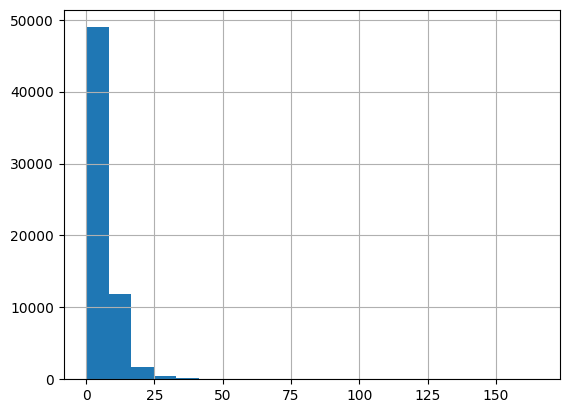

In [22]:
X_filtered['TaxiIn'].hist(bins=20)

<Axes: >

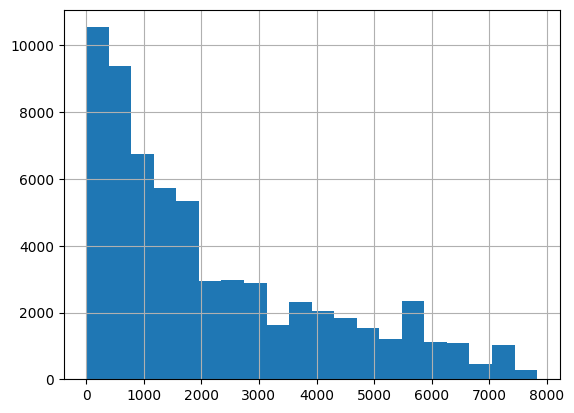

In [23]:
X_filtered['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**Проблема, наблюдаемая на графиках:**  
Значения признаков имеют очень разные масштабы:

DepTime_Hour: Значения от 0 до 24 (часы).
TaxiIn: Значения примерно от 0 до 50 (минуты).
FlightNum: Значения от низких чисел до более 8000 (номер рейса).
Эта разница в масштабах создает проблему, потому что признаки с изначально большим диапазоном значений (как FlightNum) будут необоснованно сильно влиять на модель, в то время как признаки с меньшим диапазоном (как DepTime_Hour) будут проигнорированы. Модель будет учиться на основе масштабов, а не реальной важности признаков.

**Как масштабирование помогает решить эту проблему:**  
Pешает эту проблему, выполняя два действия для каждого признака: 
- Центрирование данных: Вычитает среднее значение признака.
- Стандартизация масштаба: Делит на стандартное отклонение признака.

Почему это важно для линейных моделей: 
- Более быстрая сходимость
- Сравнимые коэффициенты
- Предотвращает доминирование
- Численная стабильность

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

def transform_data(data):  # Преобразует данные для обучения линейных моделей

    df_processed = data.copy()
    
    # Определяем типы признаков
    numeric_columns = df_processed.select_dtypes(include=[np.number]).columns
    categorical_columns = df_processed.select_dtypes(include=['object']).columns
    
    # 1. Замена пропущенных значений
    for col in numeric_columns:
        df_processed[col] = df_processed[col].fillna(0)
    
    for col in categorical_columns:
        df_processed[col] = df_processed[col].fillna('nan')
    
    # 2. Масштабирование вещественных признаков
    scaler = StandardScaler()
    df_processed[numeric_columns] = scaler.fit_transform(df_processed[numeric_columns]) #estandarizo datos
    
    # 3. One-hot кодирование категориальных признаков
    df_processed = pd.get_dummies(df_processed, columns=categorical_columns, prefix_sep='_') #cambio de categ a num
    
    return df_processed



Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [25]:
# Применяем преобразование
X_final = transform_data(X_filtered)

print(f"Размерность после полного преобразования: {X_final.shape}")
print(f"Типы признаков: {X_final.dtypes.value_counts()}")

Размерность после полного преобразования: (63404, 630)
Типы признаков: bool       614
float64     16
Name: count, dtype: int64


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [26]:
from sklearn.model_selection import train_test_split

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42) #70% training y 30% test

print(f"Обучающая выборка: {X_train.shape}, {y_train.shape}")
print(f"Контрольная выборка: {X_test.shape}, {y_test.shape}")

# Для экономии времени возьмем подвыборку
X_train_small = X_train.iloc[:1000]
y_train_small = y_train.iloc[:1000]

print(f"Маленькая обучающая выборка: {X_train_small.shape}, {y_train_small.shape}")

Обучающая выборка: (44382, 630), (44382,)
Контрольная выборка: (19022, 630), (19022,)
Маленькая обучающая выборка: (1000, 630), (1000,)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Обучаем модель
lr = LinearRegression()
lr.fit(X_train_small, y_train_small)

# Прогнозы
y_train_pred = lr.predict(X_train_small)
y_test_pred = lr.predict(X_test)

# Метрики
train_mse = mean_squared_error(y_train_small, y_train_pred)
train_r2 = r2_score(y_train_small, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Метрики качества:")
print(f"Обучающая выборка - MSE: {train_mse:.2f}, R²: {train_r2:.4f}")
print(f"Контрольная выборка - MSE: {test_mse:.2f}, R²: {test_r2:.4f}")

# Анализ коэффициентов
print(f"\nАнализ коэффициентов:")
print(f"Количество коэффициентов: {len(lr.coef_)}")
print(f"Минимальный коэффициент: {lr.coef_.min():.4f}") # w-peso min
print(f"Максимальный коэффициент: {lr.coef_.max():.4f}") # w-peso max
print(f"Среднее абсолютное значение коэффициентов: {np.abs(lr.coef_).mean():.4f}")

# Проблемы: возможно переобучение (overfitting), большие значения коэффициентов

Метрики качества:
Обучающая выборка - MSE: 595.77, R²: 0.4379
Контрольная выборка - MSE: 1565.84, R²: -0.1706

Анализ коэффициентов:
Количество коэффициентов: 630
Минимальный коэффициент: -53.2137
Максимальный коэффициент: 145.2382
Среднее абсолютное значение коэффициентов: 7.2554


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [28]:
# Your code here

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

Lasso:
  Всего коэффициентов: 630
  Ненулевых коэффициентов: 6
  Нулевых коэффициентов: 624
  Доля нулевых: 0.9905
Ridge:
  Всего коэффициентов: 630
  Ненулевых коэффициентов: 350
  Нулевых коэффициентов: 280
  Доля нулевых: 0.4444


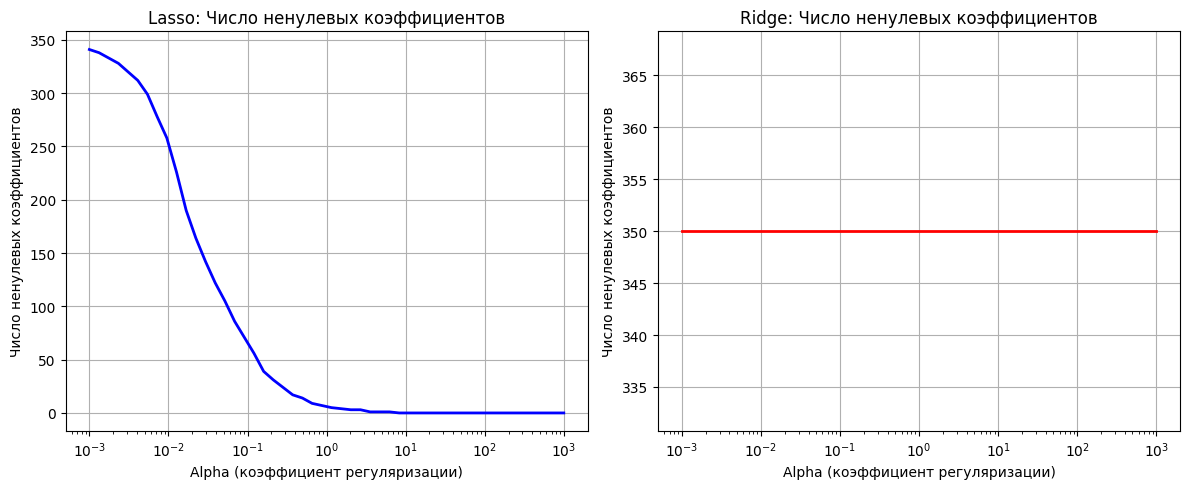


Интерпретация:
Lasso обнуляет коэффициенты при увеличении alpha (L1-регуляризация)
Ridge уменьшает коэффициенты, но не обнуляет полностью (L2-регуляризация)


In [29]:
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

# Инициализация моделей
lasso = Lasso(random_state=42)
ridge = Ridge(random_state=42)

# Обучение моделей
lasso.fit(X_train_small, y_train_small)
ridge.fit(X_train_small, y_train_small)

# Анализ коэффициентов
def analyze_coefficients(model, model_name, threshold=1e-6):
    n_nonzero = np.sum(np.abs(model.coef_) > threshold) # number of nonzero weights (w)
    n_zero = len(model.coef_) - n_nonzero
    print(f"{model_name}:")
    print(f"  Всего коэффициентов: {len(model.coef_)}")
    print(f"  Ненулевых коэффициентов: {n_nonzero}")
    print(f"  Нулевых коэффициентов: {n_zero}")
    print(f"  Доля нулевых: {n_zero/len(model.coef_):.4f}")
    return n_nonzero

# Анализ начальных моделей
lasso_nonzero_init = analyze_coefficients(lasso, "Lasso")
ridge_nonzero_init = analyze_coefficients(ridge, "Ridge")

# График зависимости числа ненулевых коэффициентов от коэффициента регуляризации
alphas = np.logspace(-3, 3, 50)
lasso_nonzero_counts = []
ridge_nonzero_counts = []

for alpha in alphas:
    lasso_temp = Lasso(alpha=alpha, random_state=42)
    ridge_temp = Ridge(alpha=alpha, random_state=42)
    
    lasso_temp.fit(X_train_small, y_train_small)
    ridge_temp.fit(X_train_small, y_train_small)
    
    lasso_nonzero_counts.append(np.sum(np.abs(lasso_temp.coef_) > 1e-6))
    ridge_nonzero_counts.append(np.sum(np.abs(ridge_temp.coef_) > 1e-6))

# Построение графиков
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, lasso_nonzero_counts, 'b-', linewidth=2)
plt.title('Lasso: Число ненулевых коэффициентов')
plt.xlabel('Alpha (коэффициент регуляризации)')
plt.ylabel('Число ненулевых коэффициентов')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogx(alphas, ridge_nonzero_counts, 'r-', linewidth=2)
plt.title('Ridge: Число ненулевых коэффициентов')
plt.xlabel('Alpha (коэффициент регуляризации)')
plt.ylabel('Число ненулевых коэффициентов')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nИнтерпретация:")
print("Lasso обнуляет коэффициенты при увеличении alpha (L1-регуляризация)")
print("Ridge уменьшает коэффициенты, но не обнуляет полностью (L2-регуляризация)")

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calculate_metrics(y_true, y_pred, model_name=""):
    """Вычисляет различные метрики качества"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}") 
    print(f"  R²: {r2:.4f}")
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Метрики для Ridge регрессии
y_ridge_pred = ridge.predict(X_test)
ridge_metrics = calculate_metrics(y_test, y_ridge_pred, "Ridge регрессия (alpha=1.0)")

Ridge регрессия (alpha=1.0):
  RMSE: 37.46
  MAE: 20.94
  R²: -0.0490


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Лучшие параметры для Ridge: {'alpha': np.float64(112.88378916846884)}
Лучший MSE: 996.4562620251169


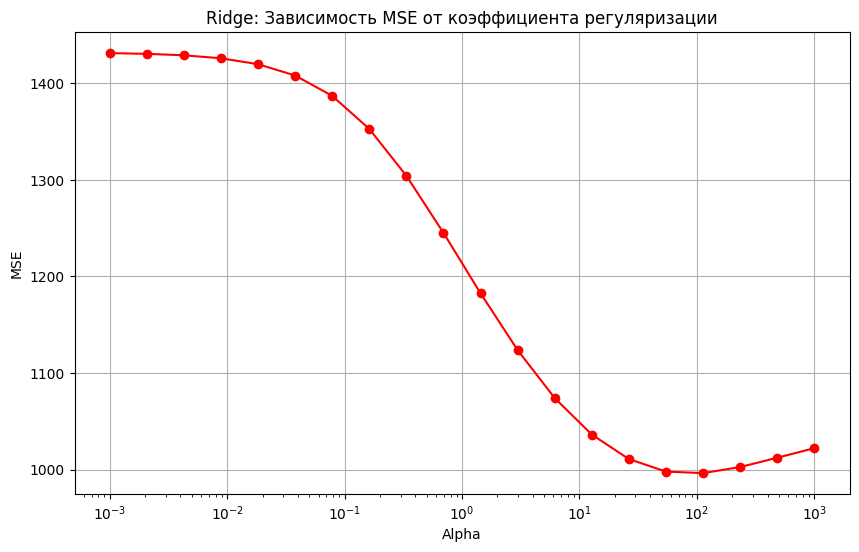

Ridge с подобранным alpha:
  RMSE: 35.47
  MAE: 18.54
  R²: 0.0597

Сравнение качества:
Ridge (alpha=1.0) R²: -0.0490
Ridge (best alpha) R²: 0.0597


In [31]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import RidgeCV, LassoCV

# Настройка кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Подбор alpha для Ridge с GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 20)}
ridge_grid = GridSearchCV(
    Ridge(random_state=42), 
    param_grid, 
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

ridge_grid.fit(X_train_small, y_train_small)

print("Лучшие параметры для Ridge:", ridge_grid.best_params_)
print("Лучший MSE:", -ridge_grid.best_score_)

# График зависимости качества от alpha
ridge_scores = -ridge_grid.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.semilogx(param_grid['alpha'], ridge_scores, 'ro-')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge: Зависимость MSE от коэффициента регуляризации')
plt.grid(True)
plt.show()

# Обучение с лучшим alpha
best_ridge = ridge_grid.best_estimator_
y_best_ridge_pred = best_ridge.predict(X_test)
best_ridge_metrics = calculate_metrics(y_test, y_best_ridge_pred, "Ridge с подобранным alpha")

print("\nСравнение качества:")
print(f"Ridge (alpha=1.0) R²: {ridge_metrics['R2']:.4f}")
print(f"Ridge (best alpha) R²: {best_ridge_metrics['R2']:.4f}")

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

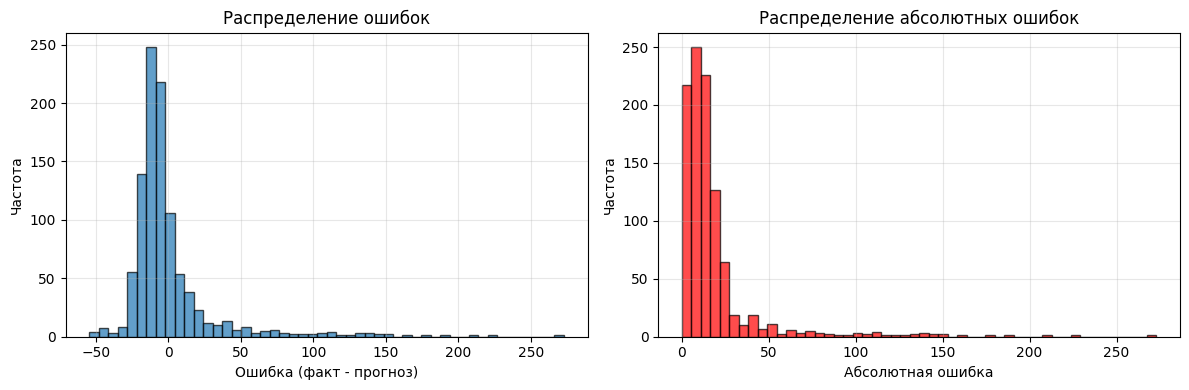

Статистики ошибок:
  mean_error: -0.01
  std_error: 31.08
  max_abs_error: 272.86
  q95_abs_error: 54.40

Выбросы (ошибки > 54.40):
  Количество выбросов: 50
  Доля выбросов: 0.0500
  Максимальная ошибка среди выбросов: 272.86
  Средняя ошибка среди выбросов: 110.05


In [32]:
from sklearn.model_selection import cross_val_predict

# Out-of-Fold предсказания для обучающей выборки
oof_predictions = cross_val_predict(
    Ridge(alpha=ridge_grid.best_params_['alpha']), 
    X_train_small, 
    y_train_small, 
    cv=5
)

# Вычисление ошибок
errors = y_train_small - oof_predictions

# Анализ распределения ошибок
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Ошибка (факт - прогноз)')
plt.ylabel('Частота')
plt.title('Распределение ошибок')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(np.abs(errors), bins=50, alpha=0.7, edgecolor='black', color='red')
plt.xlabel('Абсолютная ошибка')
plt.ylabel('Частота')
plt.title('Распределение абсолютных ошибок')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистики ошибок
error_stats = {
    'mean_error': np.mean(errors),
    'std_error': np.std(errors),
    'max_abs_error': np.max(np.abs(errors)),
    'q95_abs_error': np.percentile(np.abs(errors), 95)
}

print("Статистики ошибок:")
for stat, value in error_stats.items():
    print(f"  {stat}: {value:.2f}")

# Выявление выбросов
outlier_threshold = np.percentile(np.abs(errors), 95)
outliers = np.abs(errors) > outlier_threshold

print(f"\nВыбросы (ошибки > {outlier_threshold:.2f}):")
print(f"  Количество выбросов: {np.sum(outliers)}")
print(f"  Доля выбросов: {np.sum(outliers)/len(errors):.4f}")

if np.sum(outliers) > 0:
    print(f"  Максимальная ошибка среди выбросов: {np.max(np.abs(errors[outliers])):.2f}")
    print(f"  Средняя ошибка среди выбросов: {np.mean(np.abs(errors[outliers])):.2f}")

In [33]:
# Анализ важности признаков для лучшей Ridge модели
feature_importance = pd.DataFrame({
    'feature': X_train_small.columns,
    'coefficient': best_ridge.coef_,
    'abs_coefficient': np.abs(best_ridge.coef_)
})

# Топ-10 самых важных признаков
top_features = feature_importance.nlargest(10, 'abs_coefficient')
print("\nТоп-10 самых важных признаков:")
for _, row in top_features.iterrows():
    sign = '+' if row['coefficient'] > 0 else '-'
    print(f"  {row['feature']}: {sign}{abs(row['coefficient']):.4f}")

# Топ-10 наименее важных признаков
bottom_features = feature_importance.nsmallest(10, 'abs_coefficient')
print("\nТоп-10 наименее важных признаков:")
for _, row in bottom_features.iterrows():
    print(f"  {row['feature']}: {row['coefficient']:.6f}")


Топ-10 самых важных признаков:
  DepTime_Hour: +10.0926
  ArrTime_Hour: -9.1576
  UniqueCarrier_CO: +3.6916
  TaxiOut: +3.4438
  CRSArrTime_Hour: +3.2061
  UniqueCarrier_WN: +3.0815
  Origin_ATL: -2.8590
  Origin_PNS: +2.8514
  UniqueCarrier_OH: +2.3642
  Dest_LAX: -2.3316

Топ-10 наименее важных признаков:
  UniqueCarrier_AQ: 0.000000
  Origin_ABE: 0.000000
  Origin_ACK: 0.000000
  Origin_ACT: 0.000000
  Origin_ACY: 0.000000
  Origin_ADK: 0.000000
  Origin_ADQ: 0.000000
  Origin_AEX: 0.000000
  Origin_AGS: 0.000000
  Origin_AKN: 0.000000
